# Description
Analysing data to predict Life expectancy of the people of the countries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json

In [2]:
import types

from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6c8a63f25f8d4ab4966f291cfa5cea5e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KwRiyjSWevT7PzpBpHT7xaCSwbEH0c8cyhtWN366qWDr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6c8a63f25f8d4ab4966f291cfa5cea5e.get_object(Bucket='lifeexpectancy-donotdelete-pr-tcc7dh2u3kx2km',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Exploration

In [3]:
print("No. of rows and columns in Data :")
print(df.shape)


No. of rows and columns in Data :
(2938, 22)


In [4]:
print("The dataset contains columns of the following data types : \n" + str(df.dtypes))

The dataset contains columns of the following data types : 
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          fl

In [5]:
print("The dataset contains following number of records for each of the columns : \n" + str(df.count()))

The dataset contains following number of records for each of the columns : 
Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64


In [6]:
print("columns which contain null values: \n" + str(df.isnull().any()))

columns which contain null values: 
Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool


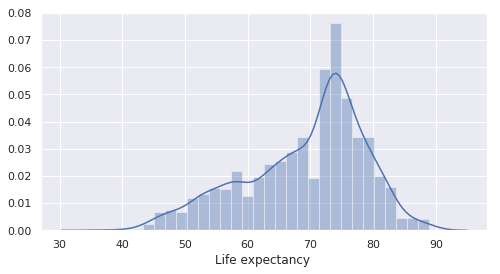

In [7]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
ax = sns.distplot(df['Life expectancy '].dropna())
plt.show()

## Data preprocesing 

In [8]:
#df=df.drop(['Country','Year'],axis=1)
#print("After deleting useless columns:")
#df.head()

In [9]:
# delete rows which have null values in GDP and Polulation Column
df=df.dropna(axis=0, subset=['GDP','Population'], how='any')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
#fill remaining empty column with average og columns
df.fillna(df.mean(), inplace = True)
print("columns which contain null values: \n" + str(df.isnull().any()))


columns which contain null values: 
Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
 BMI                               False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
 HIV/AIDS                          False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool


In [11]:
categoricalColumns=df.select_dtypes(include=[np.object]).columns
print("Categorical columns in data:")
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')
categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Categorical columns in data:
Index(['Country', 'Status'], dtype='object')


In [12]:
numericalColumns = [col for col in df.select_dtypes(include=[np.float,np.int]).columns if col not in ['Life expectancy ']]
print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()
numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])


Numerical columns : 
['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [13]:
preprocessorForNumericalColumns = ColumnTransformer(transformers=[('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")

preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")

df_temp = preprocessorForAllColumns.fit_transform(df)
print("Data after transforming :")
print(df_temp)


Data after transforming :
  (0, 0)	1.0
  (0, 146)	1.0
  (0, 147)	1.6289755507652988
  (0, 148)	0.7250557136825279
  (0, 149)	0.20990341204568885
  (0, 150)	-1.200358012589382
  (0, 151)	-0.353446870142551
  (0, 152)	-0.6234740361549205
  (0, 153)	-0.12213120558237388
  (0, 154)	-0.9294694827373803
  (0, 155)	0.19699545432278567
  (0, 156)	-3.1655393944755352
  (0, 157)	0.9306536197557672
  (0, 158)	-0.6892429533159575
  (0, 159)	-0.3460238722320124
  (0, 160)	-0.44664296800855713
  (0, 161)	0.34157975133861923
  (0, 162)	2.6494602167079893
  (0, 163)	2.603174098888399
  (0, 164)	-0.6792025505150575
  (0, 165)	-0.5356737063330131
  (0, 166)	65.0
  (1, 0)	1.0
  (1, 146)	1.0
  (1, 147)	1.4116380148508278
  :	:
  (2262, 164)	-0.927998163087189
  (2262, 165)	-0.6243693624376893
  (2262, 166)	45.3
  (2263, 144)	1.0
  (2263, 146)	1.0
  (2263, 147)	-1.631087487951765
  (2263, 148)	3.8469095802525253
  (2263, 149)	-0.07731245373531288
  (2263, 150)	-0.7738551087543966
  (2263, 151)	-0.386246465

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
features = df.drop(['Life expectancy '], axis=1)
label = df['Life expectancy ']
print(" value of label : \n" + str(label))

 value of label : 
0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2917    47.9
2918    46.4
2919    45.5
2920    44.6
2921    43.8
2922    67.0
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2264, dtype: float64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=0)
print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1698, 21) Output label(1698,)
Dimensions of datasets that will be used for testing : Input features(566, 21) Output label(566,)


In [16]:
def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

def two_d_compare(X_test,y_test,y_pred,model_name):
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
slRegressor = LinearRegression()
slregressor = Pipeline(steps=[('preprocessorforall',preprocessorForAllColumns),('regressor', slRegressor)])
slregressor.fit(X_train,y_train)
y_pred_slr= slregressor.predict(X_test)
slrMetrics = model_metrics(slregressor,y_test,y_pred_slr)

Mean squared error: 4.08
R2 score: 0.96


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


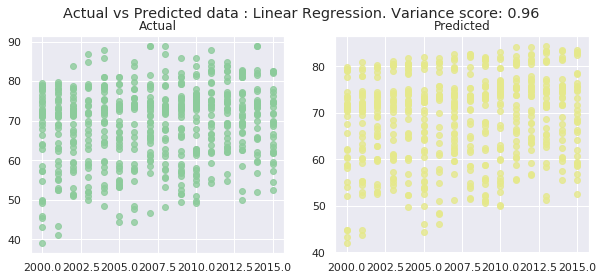

In [18]:
two_d_compare(X_test['Year'],y_test,y_pred_slr,"Linear Regression")

In [19]:
"""from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
plRegressor = LinearRegression()

plr_model = Pipeline(steps=[('preprocessorforall',preprocessorForAllColumns),('polyFeature',polynomial_features ),('regressor', plRegressor)])

plr_model.fit(X_train,y_train)

y_pred_plr= plr_model.predict(X_test)

plrMetrics = model_metrics(plr_model,y_test,y_pred_plr)"""

"from sklearn.preprocessing import PolynomialFeatures\npolynomial_features= PolynomialFeatures(degree=3)\nplRegressor = LinearRegression()\n\nplr_model = Pipeline(steps=[('preprocessorforall',preprocessorForAllColumns),('polyFeature',polynomial_features ),('regressor', plRegressor)])\n\nplr_model.fit(X_train,y_train)\n\ny_pred_plr= plr_model.predict(X_test)\n\nplrMetrics = model_metrics(plr_model,y_test,y_pred_plr)"

In [20]:
from sklearn.tree import DecisionTreeRegressor

decisionTreeRegressor = DecisionTreeRegressor(random_state=0)

dtr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', decisionTreeRegressor)]) 

dtr_model.fit(X_train,y_train)

y_pred_dtr = dtr_model.predict(X_test)
dtrMetrics = model_metrics(dtr_model,y_test,y_pred_dtr)

Mean squared error: 6.65
R2 score: 0.93


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


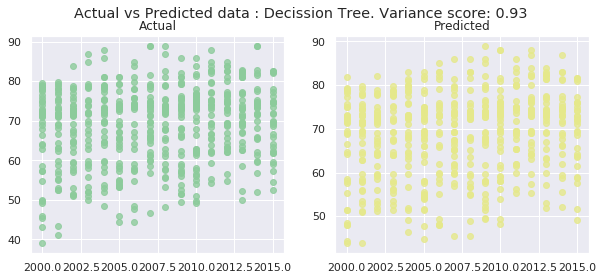

In [21]:
two_d_compare(X_test['Year'],y_test,y_pred_dtr,"Decission Tree")

In [22]:
from sklearn.ensemble import RandomForestRegressor


randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15,random_state=0)

rfr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', randomForestRegressor)]) 

rfr_model.fit(X_train,y_train)

y_pred_rfr = rfr_model.predict(X_test)
rfrMetrics = model_metrics(rfr_model,y_test,y_pred_rfr)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Mean squared error: 3.80
R2 score: 0.96


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


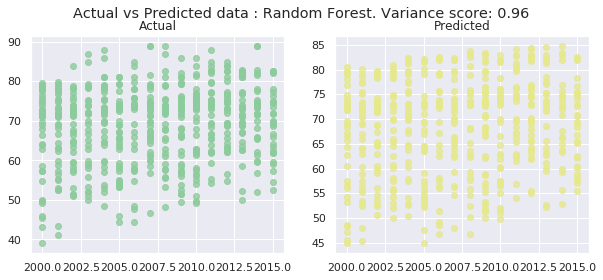

In [23]:
two_d_compare(X_test['Year'],y_test,y_pred_rfr,"Random Forest")

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
extraTreeRegressor = ExtraTreesRegressor(random_state=0,n_estimators=100)
etr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', extraTreeRegressor)]) 
etr_model.fit(X_train,y_train)
y_pred_etr = etr_model.predict(X_test)
etrMetrics = model_metrics(etr_model,y_test,y_pred_etr)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Mean squared error: 3.12
R2 score: 0.97


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


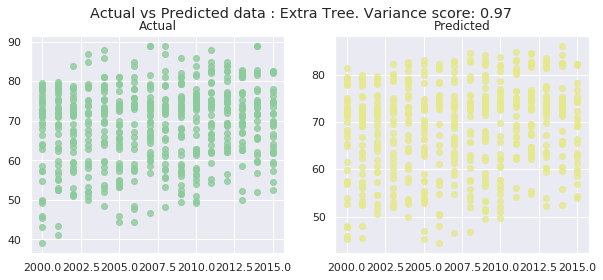

In [25]:
two_d_compare(X_test['Year'],y_test,y_pred_etr,"Extra Tree")

#### Extra Tree Regressor Outperforms.